In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

In [99]:
dataf = pd.read_csv("results/responses.csv")

In [127]:
def getBars(df,labels,value):
    bars = []
    for i in labels:
        bars.append(df.groupby("modal").get_group(i)[value].tolist())
    return bars

def plotBars(bars, ylabel, labels, fluxos, fname=None):
    # set width of bar
    barWidth = 0.2
    sns.set(style="white")

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    colors = ["#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d"]
    
    r1 = np.arange(len(bars[0]*2),step=2)
    for i in range(len(bars)): # bar number per flow

        plt.bar(r1, bars[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i],hatch=patterns[i])
        r1 = [x + barWidth for x in r1]
    
    # Add xticks on the middle of the group bars
    plt.xlabel('Routes', fontweight='bold')
    plt.ylabel(ylabel[0].upper() + ylabel[1:], fontweight='bold')
    plt.xticks([2*r + 4*barWidth for r in range(len(bars[0]))], fluxos)
 
    # Create legend & Show graphic
    plt.legend(loc="upper center",bbox_to_anchor=(0.33,1.25),fancybox=True,shadow=True,ncol=3)
    
    sns.despine()
    plt.rcParams["figure.figsize"] = (8,4)
    
    if fname != None: plt.savefig('data/results/plots/'+fname)
    plt.show()
    plt.close()

def plotBoxPlots(df,label,x,y,fname=None):
    plt.figure()
    plt.title(f"{label} per modal")
    sns.boxplot(data=df,x=x,y=y)
    plt.xlabel(label)
    plt.ylabel("Modal")
    if fname != None: plt.savefig('data/results/plots/'+fname)
    plt.show()

def divide_range(min_val, max_val):

    divisions = np.linspace(min_val, max_val, 4)
    windows = [(divisions[i]) for i in range(3)]

    return windows

In [106]:
## dataset filtering

rmLabels = ['Unnamed: 0','setID','modal']
ylabels = dataf.columns
ylabels = [ele for ele in ylabels if ele not in rmLabels]

labels = dataf['modal'].unique().tolist()
if "error" in labels: labels.remove("error")

removeID = dataf.loc[dataf['modal'] == 'error']['setID'].to_list()
dataf_new = dataf.drop(dataf[dataf['setID'].isin(removeID)].index)

In [133]:
## separating data by range

dataf_median = dataf_new.groupby("setID")['distance'].median()
distance_wind = divide_range(min(dataf_median), max(dataf_median))

series_wind1 = dataf_median.loc[dataf_median <= distance_wind[1]]
series_wind2 = dataf_median.loc[(dataf_median > distance_wind[1]) & (dataf_median <= distance_wind[2])]
series_wind3 = dataf_median.loc[dataf_median > distance_wind[2]]

windows = [series_wind1,series_wind2,series_wind3]

#dataf_wind1 = dataf_new.loc[dataf_new['setID'].isin(series_wind1.index.tolist())]
#dataf_wind2 = dataf_new.loc[dataf_new['setID'].isin(series_wind2.index.tolist())]
#dataf_wind3 = dataf_new.loc[dataf_new['setID'].isin(series_wind3.index.tolist())]

group 1


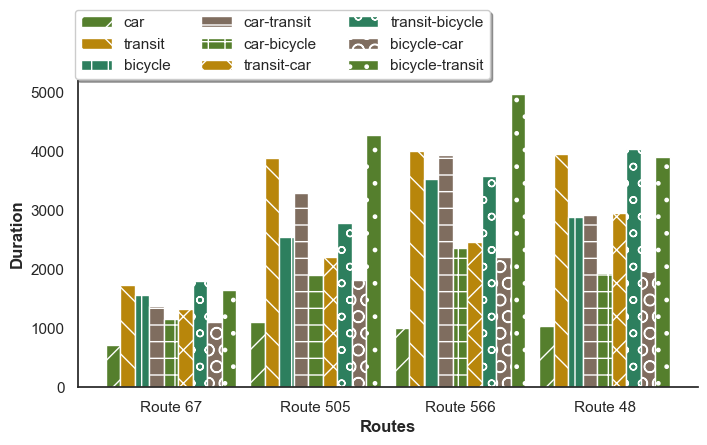

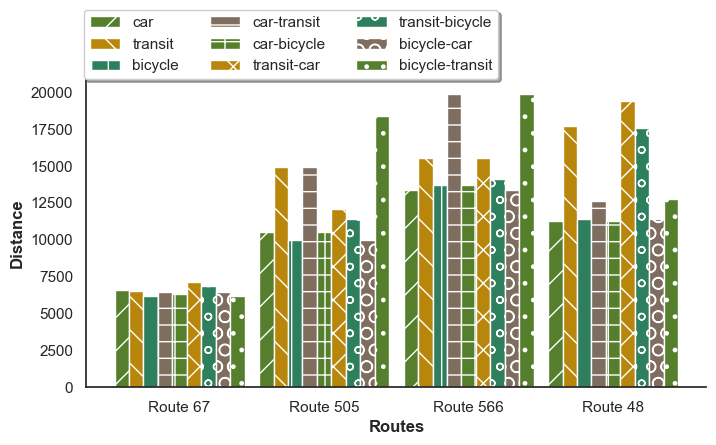

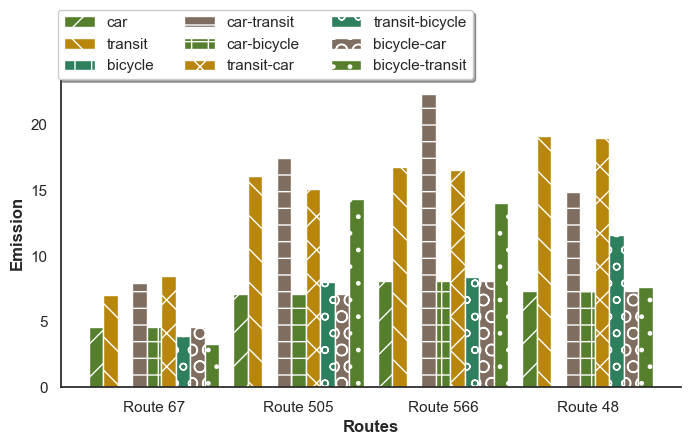

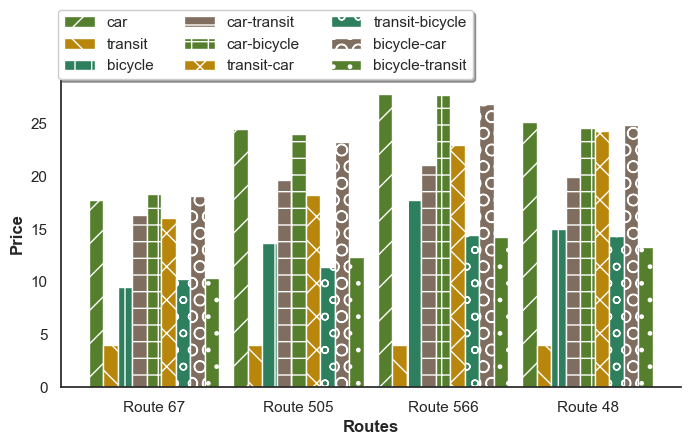

group 2


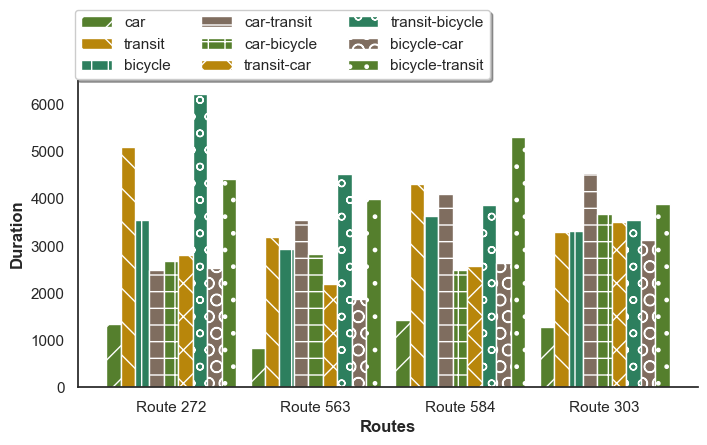

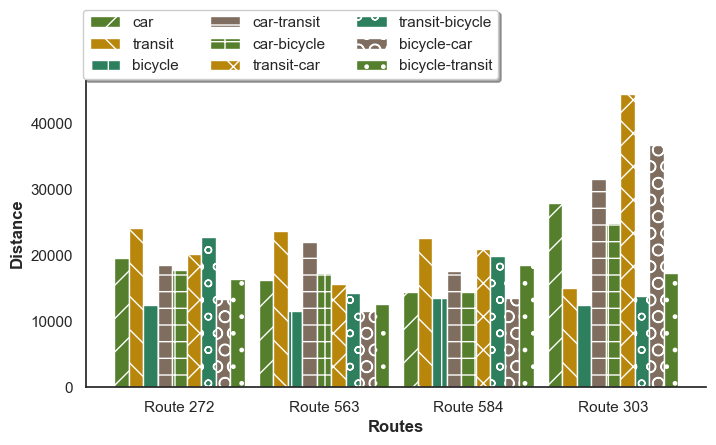

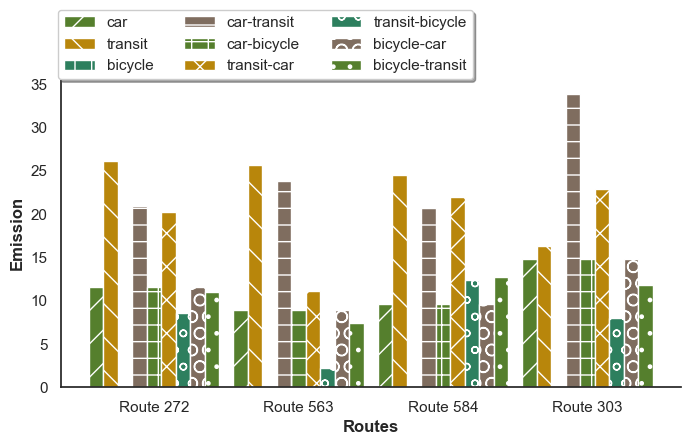

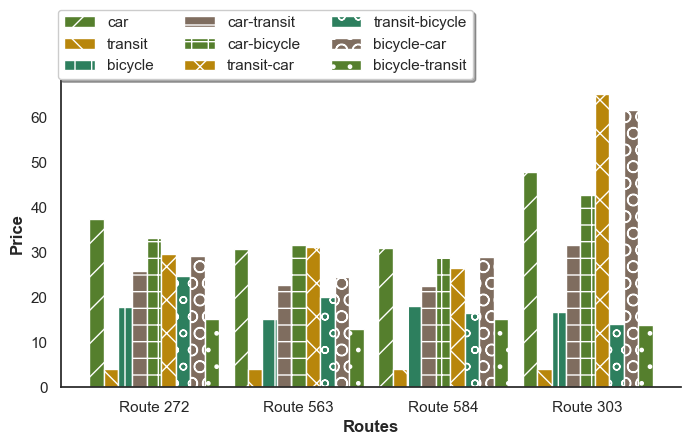

group 3


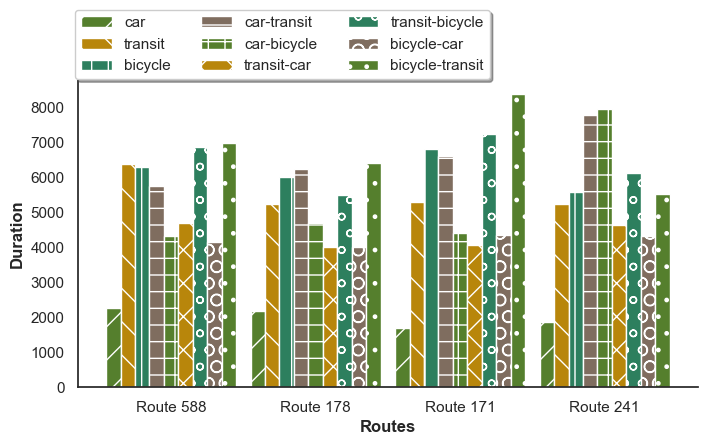

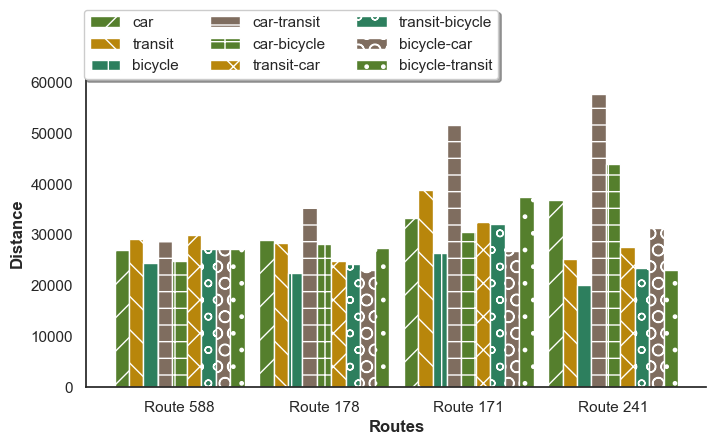

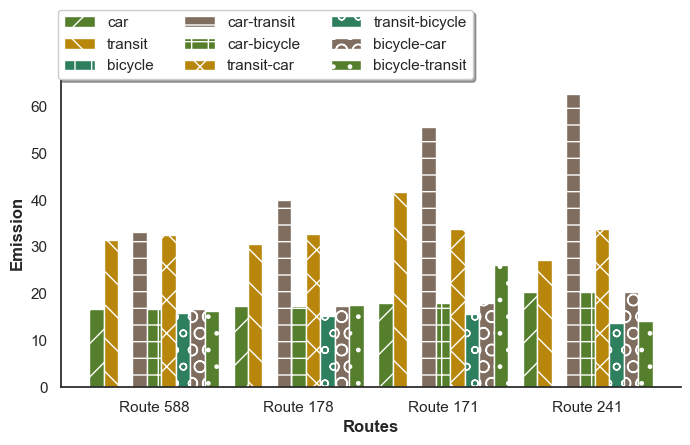

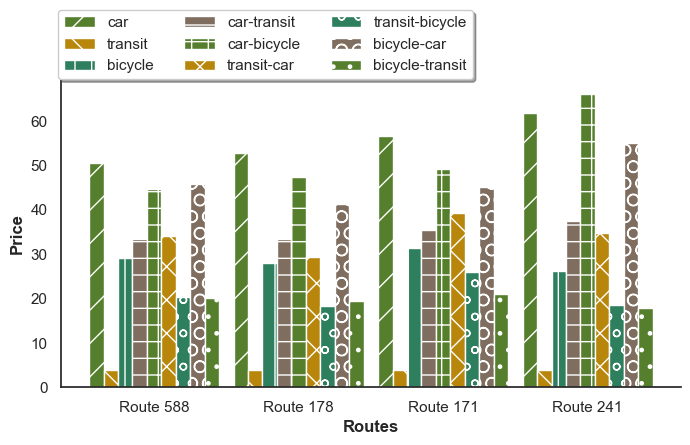

In [138]:
## barplot
rd.seed(10)

for j in range(len(distance_wind)):
    print("group",j+1)
    sampl = rd.sample(sorted(windows[j].index),4)

    group = dataf_new.loc[dataf_new['setID'].isin(sampl)]
    routes = list(map(lambda x: f"Route {int(x)}",sampl))
    for i in ylabels:
        bars = getBars(group,labels,i)
        plotBars(bars,i,labels,routes)
    

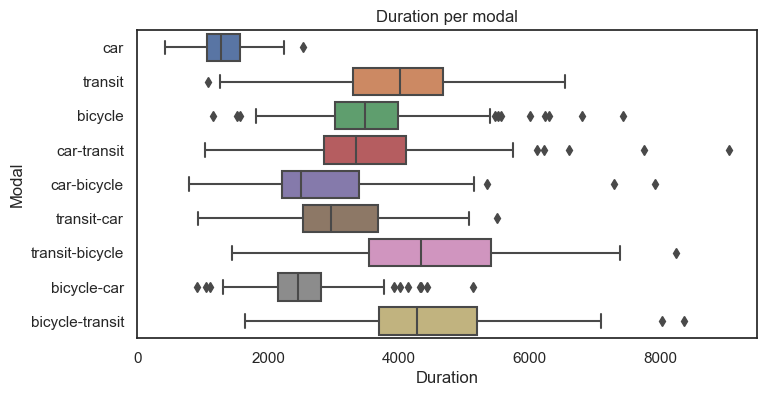

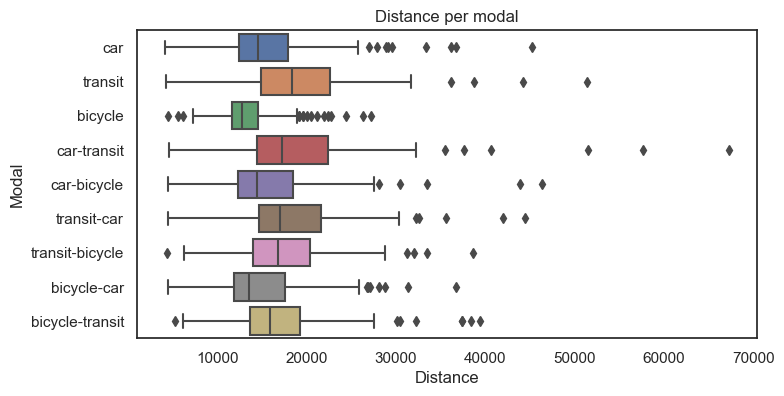

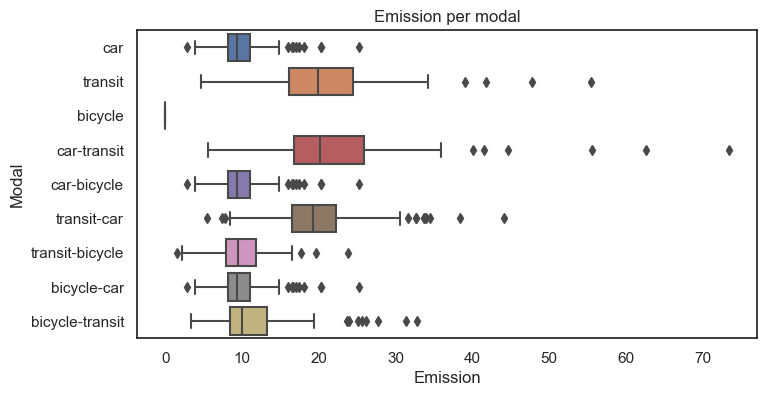

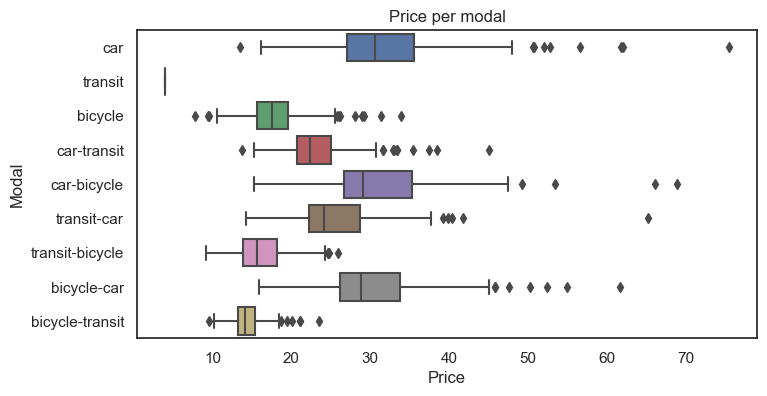

In [126]:
## boxplot

for i in range(len(ylabels)):
    upper = ylabels[i][0].upper() + ylabels[i][1:]
    
    plotBoxPlots(dataf_new,upper,ylabels[i],"modal")

In [ ]:
# median barplot

for i in range(windows):

    plt.bar(r1,i.values)

    plt.plot()